### Import required libraries

In [1]:
import pandas as pd
import numpy as np

- ### Loading the Dataset

In [2]:
df = pd.read_csv("E:\Data Science Notes\8.MACHINE LEARNING\homeprices1\homeprices1.csv")

In [3]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


- ### Doing some EDA

In [4]:
df.shape

(6, 4)

In [5]:
df.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


In [6]:
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [7]:
# Here ,getting missing  value in bedrooms columns, doing filling NaN value

- ### Filling missing value with median

In [8]:
m = df.bedrooms.median()

In [9]:
m

4.0

In [10]:
df.bedrooms = df.bedrooms.fillna(m) 

In [11]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [12]:
df.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

- ### Data Preparation

In [36]:
X = df.drop('price', axis = 'columns').values

y = df.price.values

In [37]:
X

array([[2.6e+03, 3.0e+00, 2.0e+01],
       [3.0e+03, 4.0e+00, 1.5e+01],
       [3.2e+03, 4.0e+00, 1.8e+01],
       [3.6e+03, 3.0e+00, 3.0e+01],
       [4.0e+03, 5.0e+00, 8.0e+00],
       [4.1e+03, 6.0e+00, 8.0e+00]])

In [38]:
y

array([550000, 565000, 610000, 595000, 760000, 810000], dtype=int64)

- ### Model Creation

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression() 

- ### Model training

In [16]:
lr.fit(X,y)

LinearRegression()

- ## Prediction

In [28]:
pred = lr.predict([[3000,4.0,15]])  

In [29]:
pred        # Actual value = 550000  &  Predicted value = 518217.63297611

array([602590.07937407])

- ### Finding coefficients & intercept

In [23]:
m = lr.coef_

m


array([  112.06244194, 23388.88007794, -3231.71790863])

In [26]:
b = lr.intercept_

b

221323.0018654043

- ### Find prediction by using formula **y = m1x1 + m2x2 + m3x3 + b**

In [27]:
# y = coefficient1*x1 + coefficient2*x2 + coefficient3*x3 + intercept
# y = m1x1 + m2x2 + m3x3 + b

y =  112.06244194*3000 + 23388.88007794*4.0 + -3231.71790863*15 + 221323.0018654043

y


602590.0793677142

- ### Price of home with 2500 sqr ft area, 4 bedrooms, 5 year old

In [45]:
lr.predict([[2500, 4, 5]])

array([578876.03748933])

In [42]:
import matplotlib.pyplot as plt

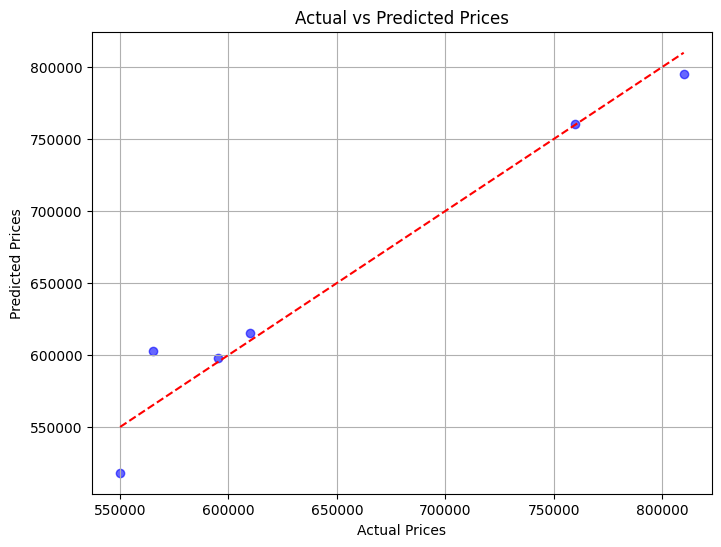

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Predicting values for the dataset
predicted_prices = lr.predict(X)

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(df.price, predicted_prices, color='blue', alpha=0.6)
plt.plot([df.price.min(), df.price.max()], [df.price.min(), df.price.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()
